In [32]:
import pandas as pd

In [42]:
df = pd.read_parquet("../data/test.parquet")

In [50]:
df

,session,aid,ts,type
0,12899779,59625,1661724000,0
1,12899780,1142000,1661724000,0
2,12899780,582732,1661724058,0
3,12899780,973453,1661724109,0
4,12899780,736515,1661724136,0
...,...,...,...,...
6928118,14571577,1141710,1662328774,0
6928119,14571578,519105,1662328775,0
6928120,14571579,739876,1662328775,0
6928121,14571580,202353,1662328781,0


In [51]:
from tqdm import tqdm

# 使用 pandas 的 value_counts() 统计 'type' 列的频数
type_num = df['type'].value_counts().to_dict()

print("三种标签的数量： ",type_num)
print(len(df["session"].value_counts()))


三种标签的数量：  {0: 6292632, 1: 570011, 2: 65480}
1671803


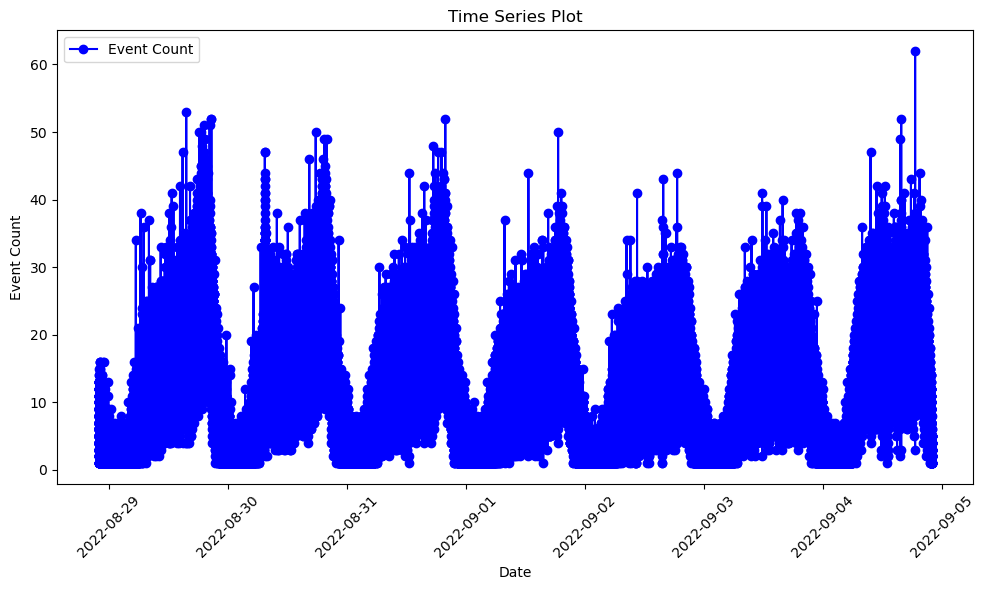

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# 假设 df['events'] 中的数据是这种结构
# 使用 pandas 提取时间戳并进行统计
timestamps = []

# 遍历 DataFrame 中的每一行，提取时间戳


# 将时间戳转换为 pandas datetime 格式（毫秒级）
timestamp_series = pd.to_datetime(df['ts'], unit='s')
# 使用 pandas value_counts 统计频率
times = timestamp_series.value_counts().sort_index()

# 分离出时间和事件计数数据
time_series = times.index
counts = times.values

# 创建图形并绘制数据
plt.figure(figsize=(10, 6))
plt.plot(time_series, counts, marker='o', color='b', linestyle='-', label='Event Count')

# 设置图表标题和标签
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Event Count')

# 显示图例
plt.legend()

# 自动调整日期标签显示方式
plt.xticks(rotation=45)

# 显示图表
plt.tight_layout()
plt.show()


In [53]:
times.index.min()

Timestamp('2022-08-28 22:00:00')

In [54]:
times.index.max()

Timestamp('2022-09-04 21:59:51')

# 训练集的统计

In [48]:
train_df = pd.read_parquet("../data/train.parquet")
train_df.head()

,session,aid,ts,type
0,0,1517085,1659304800,0
1,0,1563459,1659304904,0
2,0,1309446,1659367439,0
3,0,16246,1659367719,0
4,0,1781822,1659367871,0


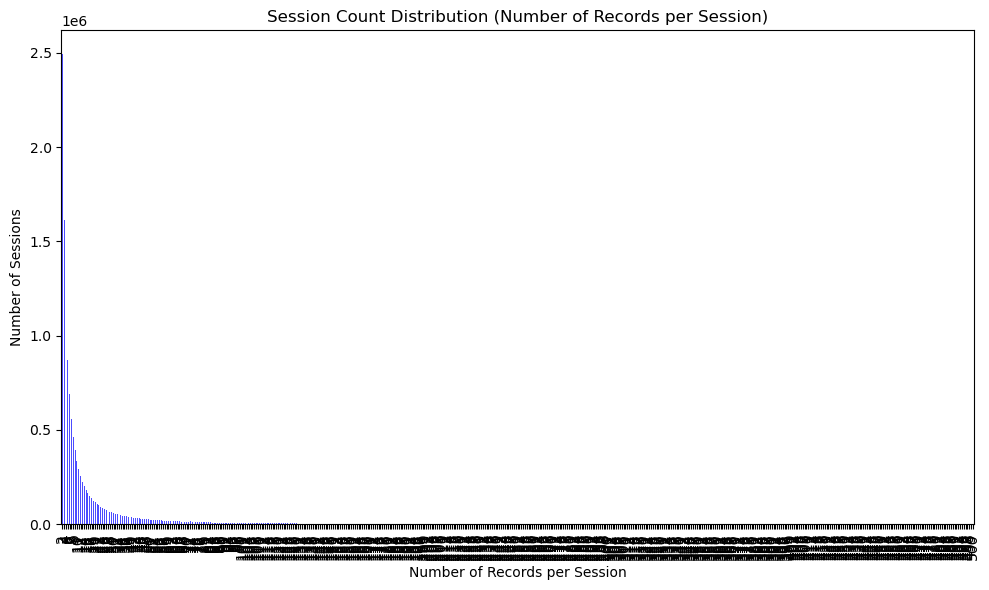

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# 假设 train_df 是你的 DataFrame，包含 'session' 列
# 计算每个 session 出现的次数
session_counts = train_df['session'].value_counts()

# 计算每个记录数出现的频率（即有多少个 session 有 1 条数据、2 条数据，依此类推）
count_distribution = session_counts.value_counts().sort_index()

# 绘制记录数分布的条形图
plt.figure(figsize=(10, 6))
count_distribution.plot(kind='bar', color='b', alpha=0.7)

# 设置图表标题和标签
plt.title('Session Count Distribution (Number of Records per Session)')
plt.xlabel('Number of Records per Session')
plt.ylabel('Number of Sessions')

# 显示图表
plt.tight_layout()
plt.show()


可以看到，session的count呈现明显的长尾分布

In [3]:
df

,session,aid,ts,type
0,12899779,59625,1661724000,0
1,12899780,1142000,1661724000,0
2,12899780,582732,1661724058,0
3,12899780,973453,1661724109,0
4,12899780,736515,1661724136,0
...,...,...,...,...
6928118,14571577,1141710,1662328774,0
6928119,14571578,519105,1662328775,0
6928120,14571579,739876,1662328775,0
6928121,14571580,202353,1662328781,0


In [8]:
df['lasttime'] = df.groupby("session")['ts'].transform("max")

In [9]:
df

,session,aid,ts,type,lasttime
0,0,1517085,1659304800,0,1661684983
1,0,1563459,1659304904,0,1661684983
2,0,1309446,1659367439,0,1661684983
3,0,16246,1659367719,0,1661684983
4,0,1781822,1659367871,0,1661684983
...,...,...,...,...,...
216716091,12899776,1737908,1661723987,0,1661723987
216716092,12899777,384045,1661723976,0,1661723986
216716093,12899777,384045,1661723986,0,1661723986
216716094,12899778,561560,1661723983,0,1661723994


In [10]:
df = df[df['lasttime']-df['ts'] <= 24*60*60]

In [11]:
df

,session,aid,ts,type,lasttime
255,0,1319939,1661607646,0,1661684983
256,0,1349536,1661607734,0,1661684983
257,0,334392,1661607781,0,1661684983
258,0,1349536,1661607810,0,1661684983
259,0,1349536,1661634295,0,1661684983
...,...,...,...,...,...
216716091,12899776,1737908,1661723987,0,1661723987
216716092,12899777,384045,1661723976,0,1661723986
216716093,12899777,384045,1661723986,0,1661723986
216716094,12899778,561560,1661723983,0,1661723994


In [14]:
a = df.groupby("session").size().tolist()

In [17]:
from collections import Counter

In [22]:
b = list(Counter(a).values())

In [29]:
sum(b[:50]) / sum(b)

0.9852235453025978